# Evolution of $n_{sig}$ and $n_{bkg}$ according to the cut on the BDT (fit V8)

Works with `fit/V8/fit_all_data_V8_2_fits_BDTs_recomputed_sWeights.ipyng`

## Import

In [1]:
import numpy as np
import json

from bd2dst3pi.locations import loc

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import plot_x_list_ys

from uncertainties import ufloat, unumpy, umath

Welcome to JupyROOT 6.22/02


## Tool functions

In [2]:
def get_index_max(L):
    idx = 0
    candidate_max = L[0]
    for i in range(1, len(L)):
        if candidate_max < L[i]:
            candidate_max = L[i]
            idx = i
    return idx

def efficiency(N):
    return np.array(N/N[0])

## Load data

we define the geometrical average $\sigma=\sqrt{(f\sigma_L)^2+((1-f)\sigma_R)^2}$ and the usual average $\sigma_2 = f\times \sigma_L + (1-f) \sigma_R$ of the full `common` signal shape.
`n_B` or $B$ is computed with the integral over $\mu\pm3\sigma$ under the signal peak, while `n_B2` or $B_2$ is computed with $\mu\pm3\sigma_2$.

I've finally chosen to use $\sigma_2$


In [3]:
# name of the data specified in 'fit_all_data_V8_2_fits_BDTs_recomputed_sWeights', to retrieve the file.
name_data = "common_cutDeltaM_V8_rFixed"

In [4]:
# def sorted_append(L, el):
#     if not isinstance(el, list):
#         el = [el]
    
#     for elem in el:
#         idx = L.searchsorted(elem)
#         L = np.insert(L, idx, elem)
#     return L

l_BDT = []
starting_value = -0.45
#starting_value = 0.15
end_value      =  0.2
step           = 0.025


value = starting_value
while value != end_value:
    if value==0:
        value = 0
    l_BDT.append(value) 
    value = np.round(value + step, 3)

In [5]:
lS = [] # Signal B0 -> Ds 3pi
#lB_combi = [] # combinatorial background under the peak, computed with sigma as a geometrical mean of sigmaL and sigmaR
lB2_combi = [] # combinatorial background, computed with sigma as the 'usual' mean of sigmaL and sigmaR
lB2_over_lB_combi = []

#ltot = [] # S + B
ltot2 = []
#squareRootlSplusB = []
squareRootlSplusB2 = []

for i, BDT in enumerate(l_BDT):
    BDT = round(BDT,3)
    if BDT==0:
        BDT=0
    
    with open(f'{loc.JSON}/{name_data}_BDT{BDT}_params.json', 'r') as f:
        params = json.load(f)

    #lB_combi.append(ufloat(params['n_B'], params['n_B_err'])) # combinatorial
    lB2_combi.append(ufloat(params['n_B2'], params['n_B2_err'])) # combinatorial
    
    #lB2_over_lB_combi.append(lB2_combi[i]/lB_combi[i])
    
    lS.append(ufloat(params[f'n_sig|BDT{BDT}'],params[f'n_sig|BDT{BDT}_err']))
    
    #ltot.append(lS[i]+lB_combi[i])
    ltot2.append(lS[i]+lB2_combi[i])
    #squareRootlSplusB.append(umath.sqrt(ltot[i]))
    squareRootlSplusB2.append(umath.sqrt(ltot2[i]))
    
lS = np.array(lS)
#lB_combi = np.array(lB_combi)
lB2_combi = np.array(lB2_combi)
#lB2_over_lB_combi = np.array(lB2_over_lB_combi)


## Define FoM

- Signal purity: $\frac{S}{S+B}$
- Signal significance: $\frac{S}{\sqrt{S+B}}$
- Figure of merit: $\frac{S}{S+B}\frac{S}{\sqrt{S+B}}$

In [6]:
#signal_purity = lS/ltot
#signal_significance = lS/squareRootlSplusB
#FoM = signal_purity*signal_significance

signal_purity2 = lS/ltot2
signal_significance2 = lS/squareRootlSplusB2
FoM2 = signal_purity2*signal_significance2

## Plot with $\sigma_1$

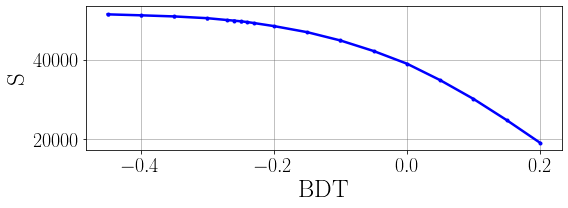

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_S.pdf


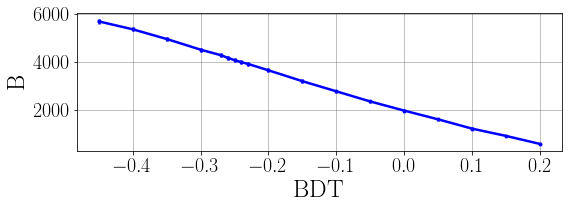

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_B.pdf


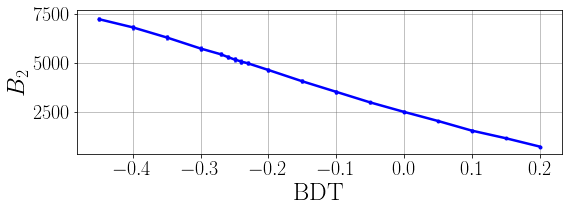

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_B_2.pdf


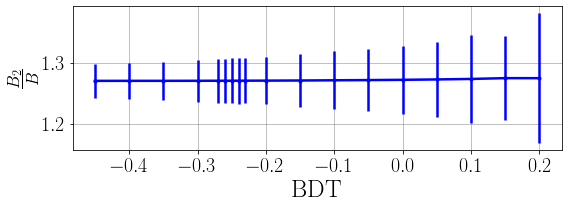

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_\frac{B_2}{B}.pdf


In [61]:
plot_x_list_ys(l_BDT, lS, 'BDT', 
               ['S'],
               name_folder=name_data)
plot_x_list_ys(l_BDT, lB_combi, 'BDT', 
               ['B'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_combi, 'BDT', 
               ['$B_2$'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_over_lB_combi, 'BDT', 
               ['$\\frac{B_2}{B}$'],
               name_folder=name_data)

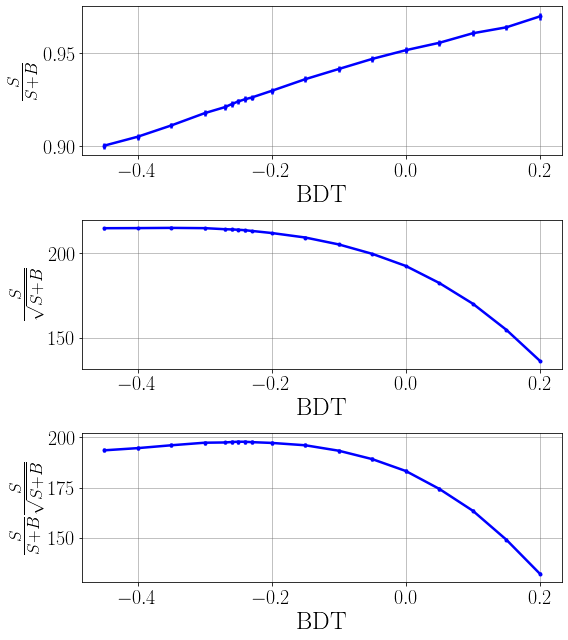

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/BDT_vs_signal_purity_signal_significance_FoM.pdf


In [12]:
plot_x_list_ys(l_BDT, [[signal_purity],[signal_significance],[FoM]], 'BDT', 
               [['Signal purity'],['Signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

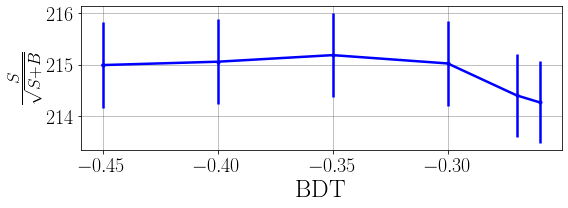

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/BDT_vs_signal_significance.pdf


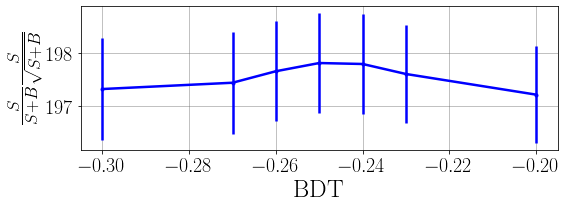

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/BDT_vs_FoM.pdf


In [13]:
plot_x_list_ys(l_BDT[:6], [signal_significance[:6]], 'BDT', 
               ['Signal significance'],
               [['$\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

plot_x_list_ys(l_BDT[3:10], [FoM[3:10]], 'BDT', 
               ['FoM'],
               [['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

## Plots with $\sigma_2$

### S, B

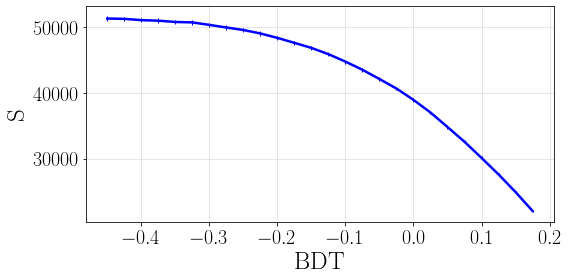

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_S.pdf


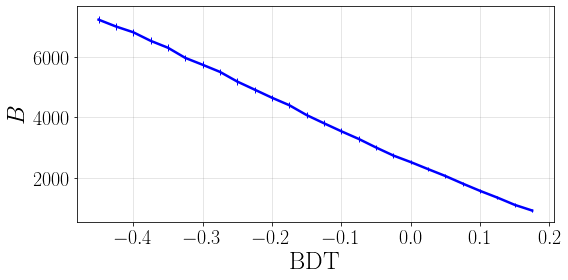

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM_V8_rFixed/BDT_vs_B.pdf


In [7]:
plot_x_list_ys(l_BDT, lS, 'BDT', 
               ['S'], surnames_y=['S'],
               name_folder=name_data)

plot_x_list_ys(l_BDT, lB2_combi, 'BDT', 
               ['$B$'],
               name_folder=name_data)

### FoM

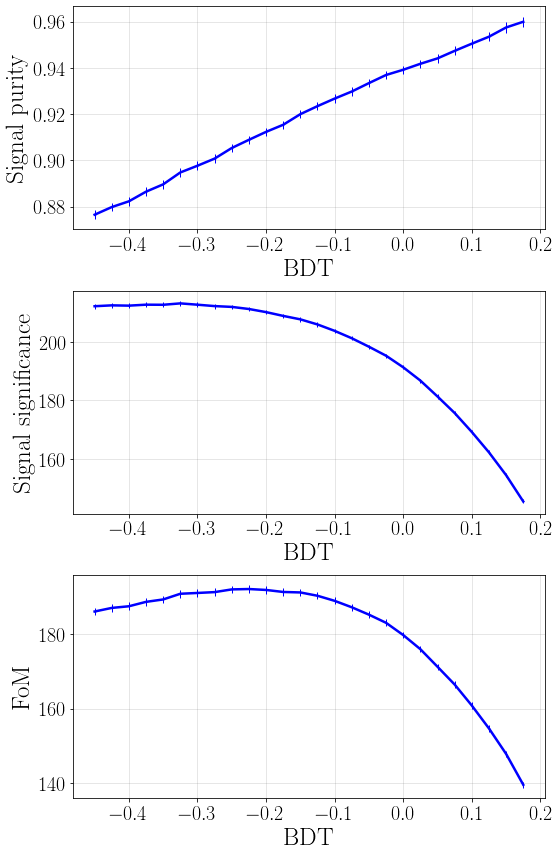

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/[['\\frac{S}{S+B}'],_['\\frac{S}{\\sqrt{S+B}}'],_['\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}']]_vs_Signal_purity_Signal_significance_FoM.pdf


In [8]:
plot_x_list_ys(l_BDT, [[signal_purity2],[signal_significance2],[FoM2]], 'BDT', 
               [['Signal purity'],['Signal significance'],['FoM']],
               [['$\\frac{S}{S+B}$'],['$\\frac{S}{\\sqrt{S+B}}$'],['$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$']], 
               name_folder='common_cutDeltaM')

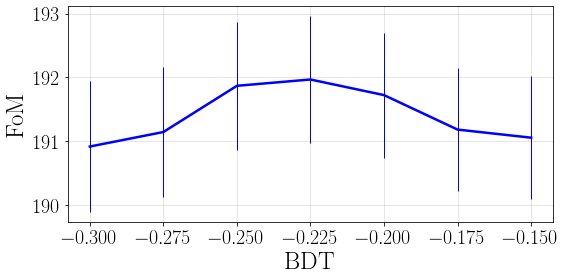

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/\frac{S}{S+B}\frac{S}{\sqrt{S+B}}_vs_FoM.pdf


In [9]:
start = 6
stop = 13
plot_x_list_ys(l_BDT[start:stop], FoM2[start:stop], 'BDT', 
               'FoM',
               '$\\frac{S}{S+B}\\frac{S}{\\sqrt{S+B}}$', 
               name_folder='common_cutDeltaM')

### ROC curve

In [10]:
S_efficiency = efficiency(lS)
B_efficiency = efficiency(lB2_combi)

In [11]:
l_BDT_label = []
for BDT in l_BDT:
    value = BDT if round(BDT%0.05,3)==0 else None
    l_BDT_label.append(value)

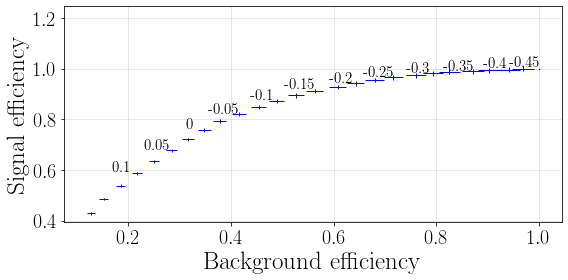

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/Background_efficiency_vs_Signal_efficiency.pdf


In [12]:
plot_x_list_ys(B_efficiency, S_efficiency, 'Background efficiency', 
               'Signal efficiency',
               name_folder='common_cutDeltaM', linestyle='', annotations=l_BDT_label, factor_ymax=1.2)

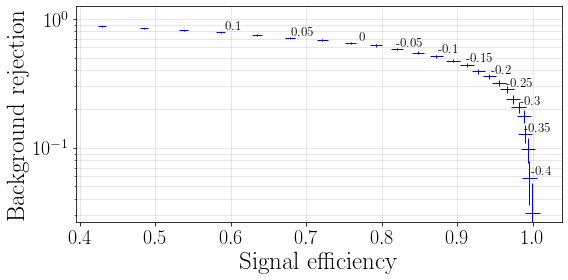

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/common_cutDeltaM/Signal__efficiency_vs_Background_rejection.pdf


In [13]:
plot_x_list_ys(S_efficiency, 1 - B_efficiency, 'Signal  efficiency', 
               'Background rejection',
               name_folder='common_cutDeltaM', linestyle='', annotations=l_BDT_label, factor_ymax=1.2, 
                fontsize_annot=13., log_scale='y',
               space_x=12, space_y=6)

## Optimal cut

In [4]:
import json
from bd2dst3pi.locations import loc

In [10]:
BDT=-0.225
name_data_BDT = "common_cutDeltaM_V8_rFixed"
name_data = 'all_common_cutDeltaM_V8_fixedTails'

with open(f'{loc.JSON}/{name_data_BDT}_BDT{BDT}_params.json', 'r') as f:
    params_opt = json.load(f)

with open(f'{loc.JSON}/{name_data}_params.json', 'r') as f:
    params = json.load(f)       

In [12]:
DeltaSoverS_opt = params_opt[f"n_sig|BDT{BDT}_err"]/params_opt[f"n_sig|BDT{BDT}"]
DeltaSoverS = params[f"n_sig_err"]/params[f"n_sig"]

In [13]:
print("optimal: ", DeltaSoverS_opt)
print("No cuts: ", DeltaSoverS)

optimal:  0.006748918273606971
No cuts:  0.007489910880635727
